## CO2 data
*** Historical CO2 Record from the Vostok Ice Core                          ***
***                                                                         ***
*** Source: J.M. Barnola                                                    ***
***         D. Raynaud                                                      ***
***         C. Lorius                                                       ***
***         Laboratoire de Glaciologie et de Geophysique de l'Environnement ***
***         38402 Saint Martin d'Heres Cedex, France                        ***
***                                                                         ***
***         N. I. Barkov                                                    ***
***         Arctic and Antarctic Research Institute                         ***
***         Beringa Street 38                                               ***
***         St. Petersburg 199226, Russia                                   ***
***                                                                         ***
*** January 2003                                                             ***

In [19]:
from astropy.io import ascii
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
coreDat = open('vostok.dat')

In [4]:
year=[]
co2=[]
for line in coreDat:
    elements = line.split()
    if (len(elements)==4 and elements[0].replace('.','',1).isdigit()):
        year.append(float(elements[2]))
        co2.append(float(elements[3]))
coreDat.close()        

In [5]:
print(min(year),max(year))
print(min(co2),max(co2))


2342.0 417160.0
182.2 298.7


In [6]:
yearGrid=np.arange(2500,402500,500)
co2Grid=np.interp(yearGrid,year,co2)

In [7]:
len(co2Grid)

800

In [22]:
min(co2Grid), max(co2Grid)

(183.13109463584823, 298.26321022727274)

In [9]:
co2Texture = Image.new("RGB",(800,1))

In [14]:
r = np.array([])
g = np.array([])
for i,co2Val in enumerate(co2Grid):
    valR=max(0,int(co2Val)-100)
    valG=int(256.0*(float(co2Val)-np.floor(float(co2Val))))
    r = np.append(r,valR)
    g = np.append(g,valG)
    co2Texture.putpixel((i,0),(valR,valG,0))

In [11]:
co2Texture

In [12]:
co2Texture.save('../data/vostok.png')

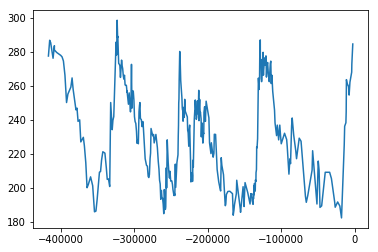

In [26]:
#plt.plot(r + 100 + g/256., co2Grid)
plt.plot(-np.array(year), co2)